In [1]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [2]:
mpg_df = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col="id")
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


In [3]:
df = mpg_df.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category'})
df.dtypes

manufacturer    category
model           category
displ            float64
year            category
cyl             category
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

In [4]:
plt.rcParams['font.family'] = "AppleGothic" if sys.platform == "darwin" else "Malgun Gothic"
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams['axes.unicode_minus'] = False

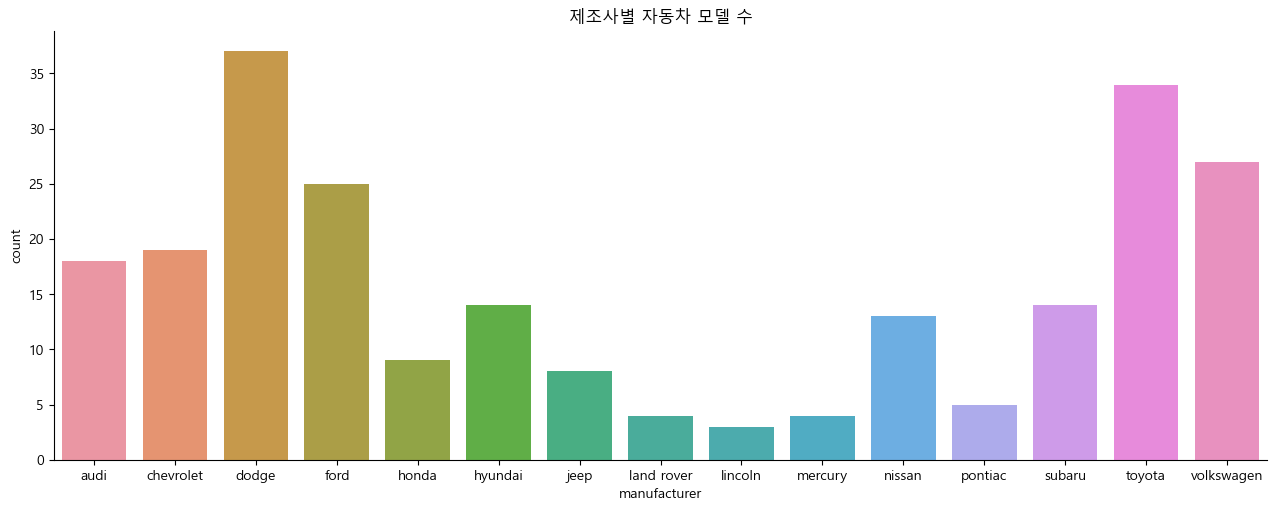

In [5]:
g = sb.catplot(data=df, x='manufacturer', kind='count')

g.fig.set_figwidth(15)
g.fig.set_figheight(5)

plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

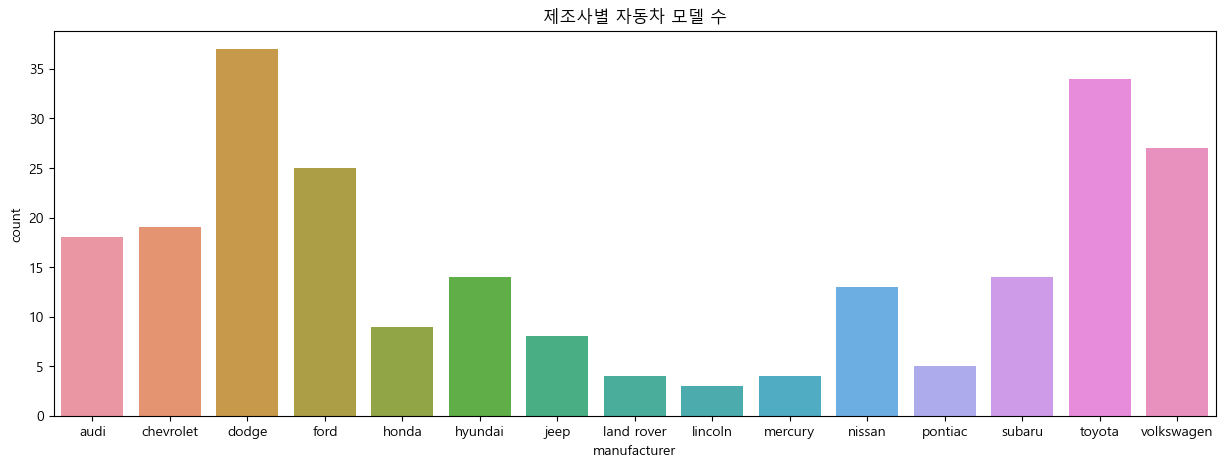

In [6]:
sb.countplot(data=df, x="manufacturer")
plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

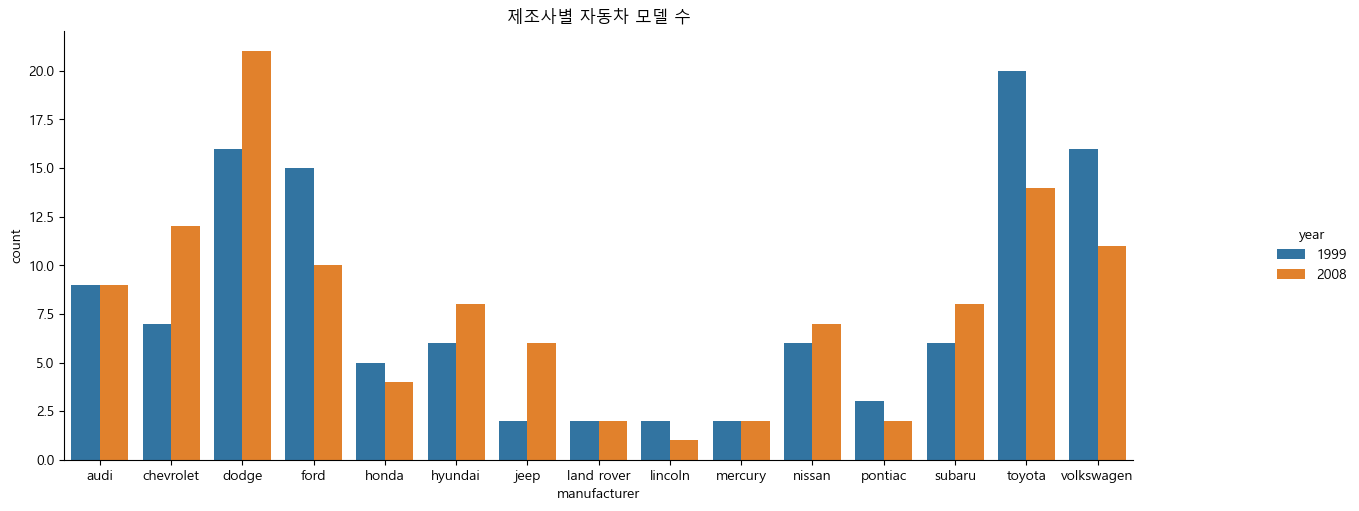

In [7]:
g = sb.catplot(data=df, x='manufacturer', kind='count', hue='year')

g.fig.set_figwidth(15)
g.fig.set_figheight(5)

plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

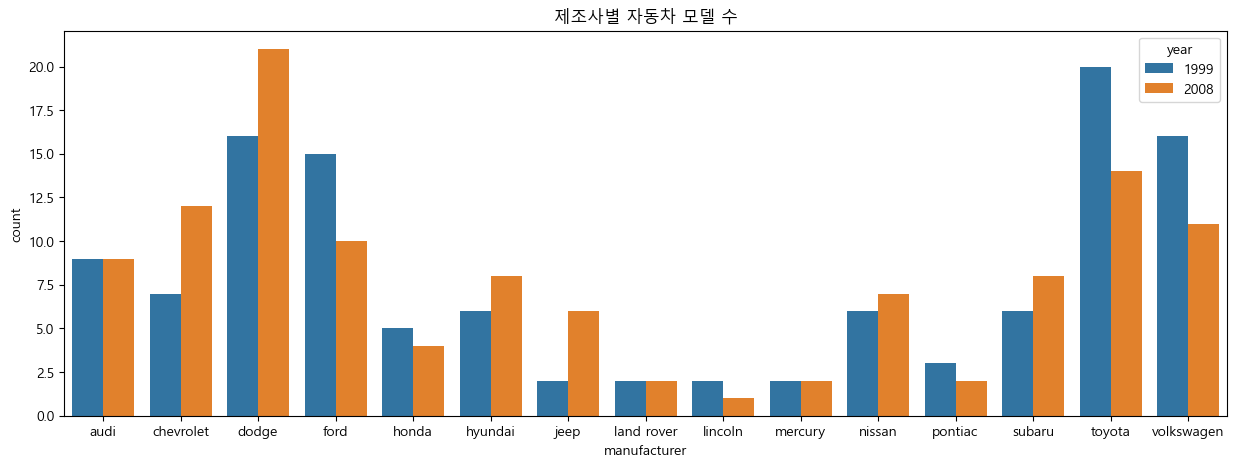

In [8]:
sb.countplot(data=df, x="manufacturer", hue='year')
plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

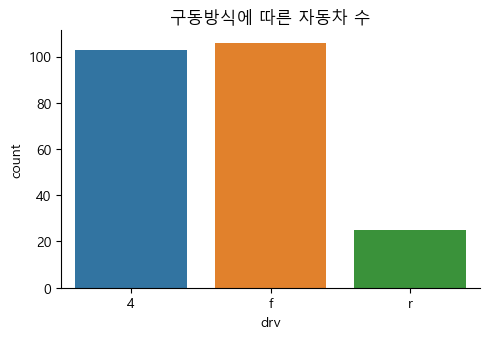

In [9]:
g = sb.catplot(data=df, x='drv', kind='count')

g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.title("구동방식에 따른 자동차 수")
plt.show()
plt.close()

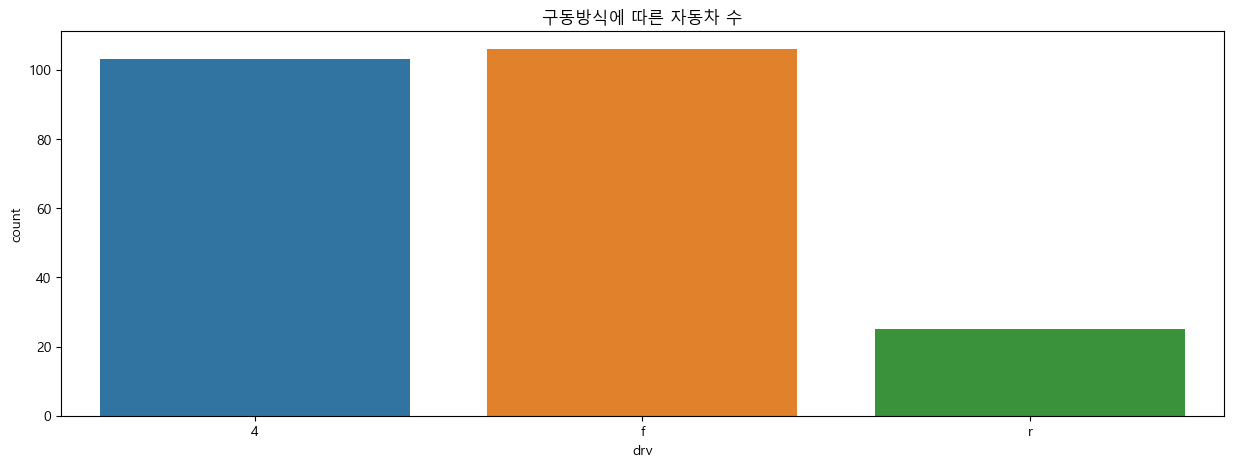

In [10]:
sb.countplot(data=df, x='drv')
plt.title("구동방식에 따른 자동차 수")
plt.show()
plt.close()

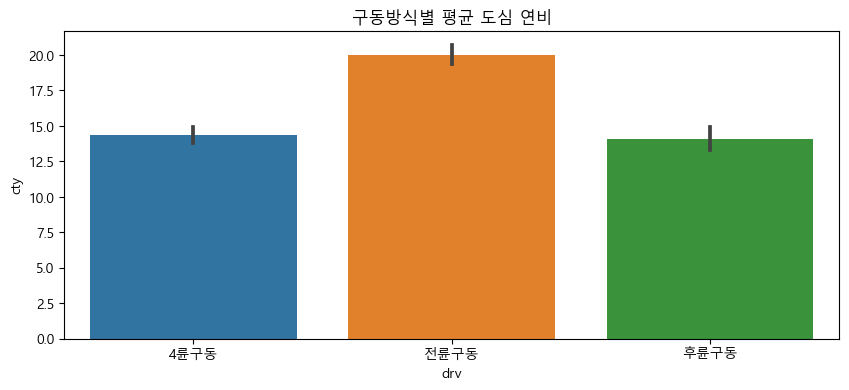

In [11]:
plt.rcParams["figure.figsize"] = (10, 4)

sb.barplot(data=df, x='drv', y='cty', estimator='mean')
plt.title("구동방식별 평균 도심 연비")
plt.xticks([0, 1, 2], ['4륜구동', '전륜구동', '후륜구동'])
plt.show()
plt.close()

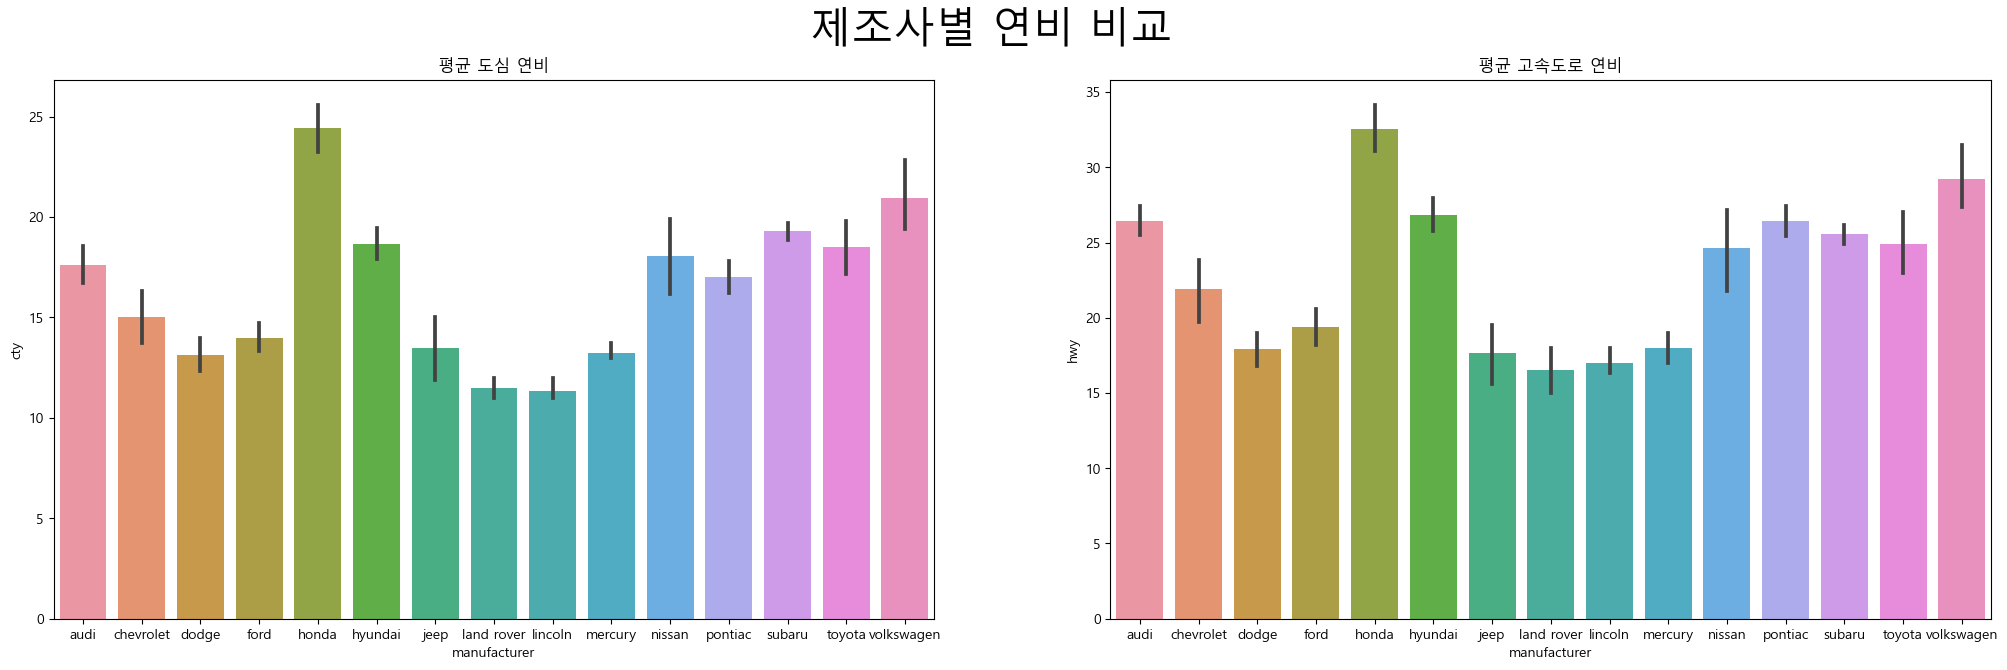

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

fig.subplots_adjust(wspace=0.2)

fig.suptitle('제조사별 연비 비교', fontsize=30)

sb.barplot(data=df, x='manufacturer', y='cty', estimator='mean', ax=ax1)
sb.barplot(data=df, x='manufacturer', y='hwy', estimator='mean', ax=ax2)

ax1.title.set_text("평균 도심 연비")
ax2.title.set_text("평균 고속도로 연비")

plt.show()
plt.close()

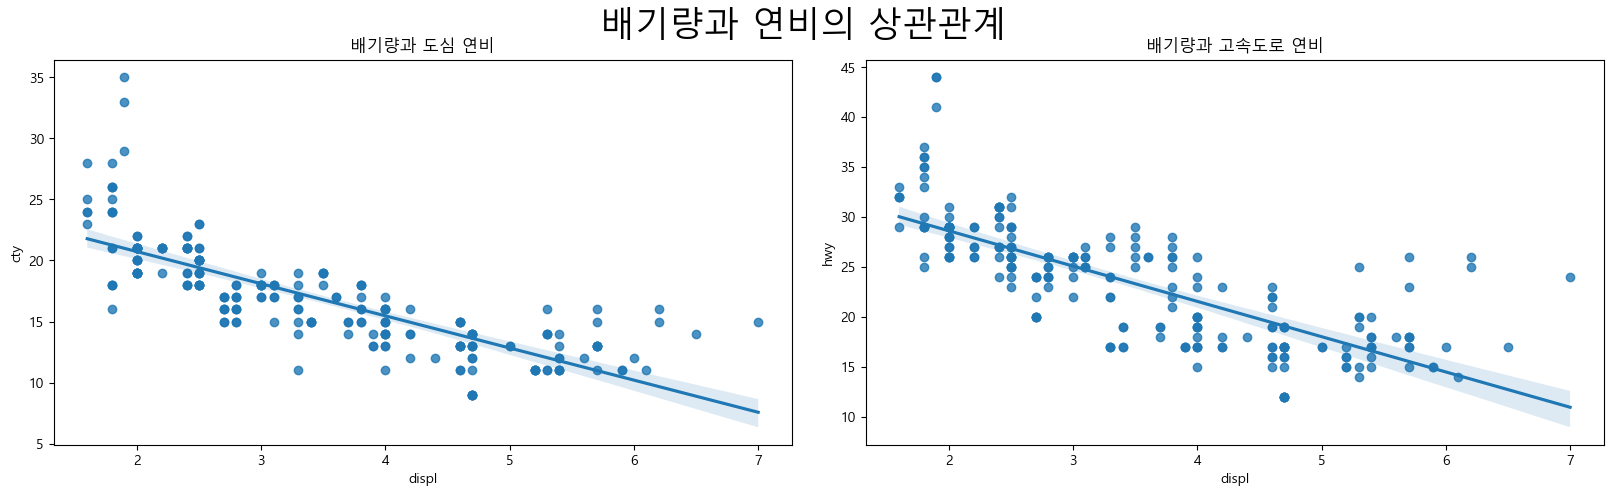

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

fig.subplots_adjust(wspace=0.1)

fig.suptitle('배기량과 연비의 상관관계', fontsize=25)

sb.regplot(data=df, x='displ', y='cty', ax=ax1)
sb.regplot(data=df, x='displ', y='hwy', ax=ax2)

ax1.title.set_text("배기량과 도심 연비")
ax2.title.set_text("배기량과 고속도로 연비")

plt.show()
plt.close()

In [14]:
df['평균연비'] = df.loc[:, 'cty':'hwy'].mean(axis=1)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0


In [15]:
평균값 = df['평균연비'].mean()
평균값

20.14957264957265

In [18]:
import numpy
df['평가'] = numpy.where(df['평균연비'] > 평균값, 'Pass', 'Fail')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass


In [19]:
평균합 = df['평균연비'].sum()
평균합

4715.0

In [20]:
df['연비효율'] = df['평균연비'] / 평균값 * 100
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,연비효율
id,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,116.627784
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,124.072110
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,126.553552
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,126.553552
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,104.220573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,116.627784
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,124.072110
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,104.220573


In [24]:
조건 = [
    (df['연비효율'] >= 90),
    (df['연비효율'] >= 80),
    (df['연비효율'] >= 70)
]

값 = ['A', 'B', 'C']

df['등급'] = numpy.select(조건, 값, default='D')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,연비효율,등급
id,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,116.627784,A
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,124.072110,A
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,126.553552,A
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,126.553552,A
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,104.220573,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,116.627784,A
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,124.072110,A
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,104.220573,A


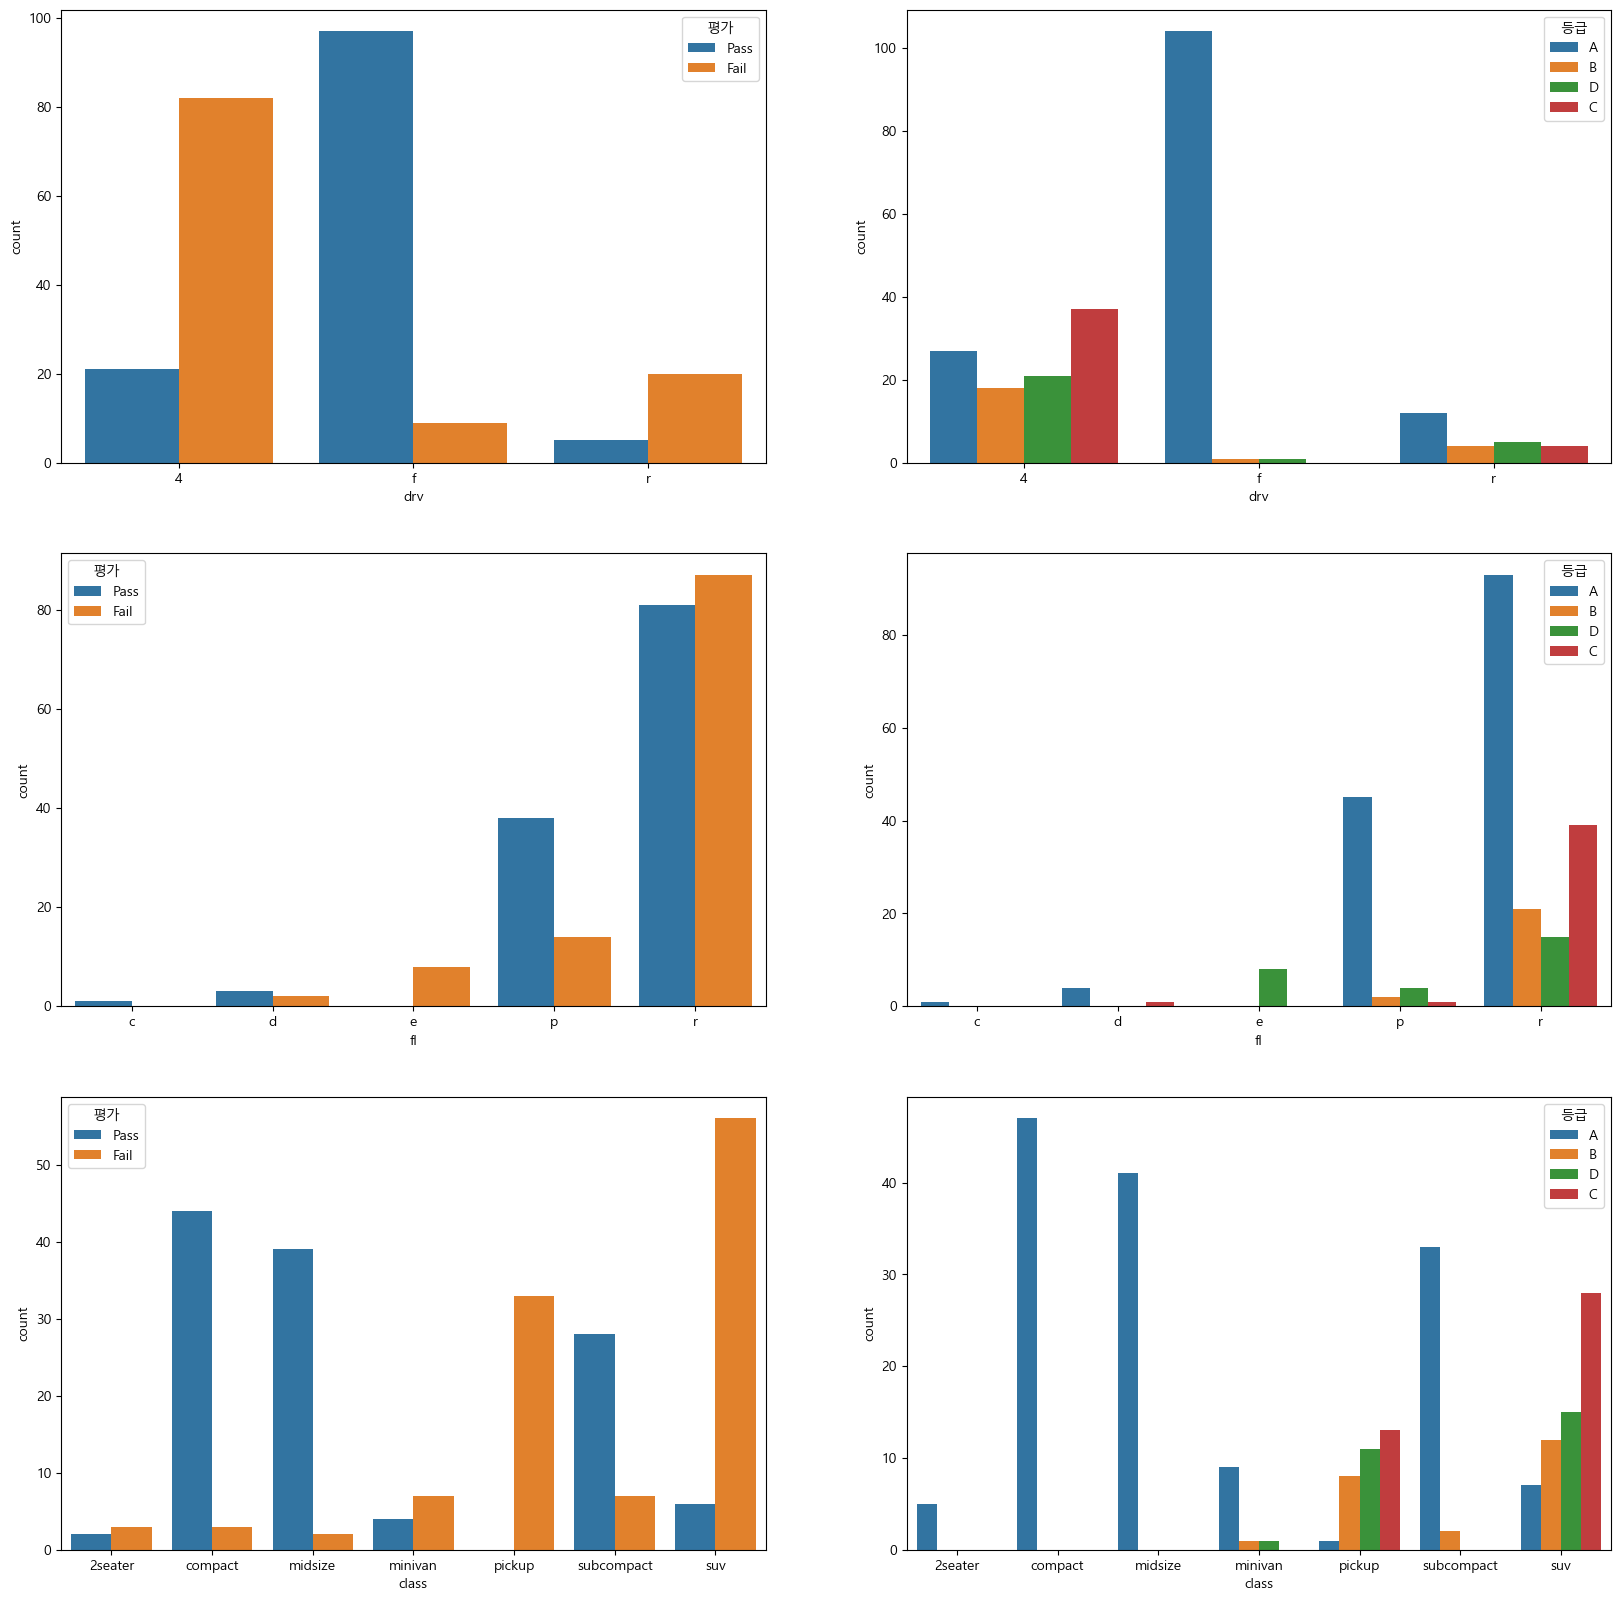

In [25]:
fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(20, 20))

# 자동차 구동방식별 평가에 대한 빈도
sb.countplot(data=df, x='drv', hue='평가', ax=ax11)

# 자동차 구동방식별 등급에 대한 빈도
sb.countplot(data=df, x='drv', hue='등급', ax=ax12)

# 자동차 연료 종류 평가에 대한 빈도
sb.countplot(data=df, x='fl', hue='평가', ax=ax21)

# 자동차 연료 종류 등급에 대한 빈도
sb.countplot(data=df, x='fl', hue='등급', ax=ax22)

# 자동차 분류별 평가에 대한 빈도
sb.countplot(data=df, x='class', hue='평가', ax=ax31)

# 자동차 분류별 등급에 대한 빈도
sb.countplot(data=df, x='class', hue='등급', ax=ax32)

plt.show()
plt.close()